In [2]:
# DSA210 Term Project – Eating Habits & Sleep Quality

#In this notebook, we analyze how healthy eating habits are related to sleep quality and sleep duration.
#The dataset consists of self-reported survey responses from 26 university students.

#We will:
#- Create a structured dataset from the survey
#- Perform basic data cleaning and descriptive statistics
#- Visualize the relationships between key variables (diet score, sleep quality, sleep duration, caffeine, etc.)
#- Conduct hypothesis tests using correlation and t-tests
#- Interpret p-values and discuss whether we reject or fail to reject the null hypotheses

#---

#**Key variables:**

#- `diet_score` (1-10): Self-rated healthy eating score
#- `sleep_score` (1-10): Self-rated sleep quality
#- `sleep_hours`: Average hours of sleep per night
#- `healthy_diet`: Binary indicator (1 = diet_score > 6, 0 = otherwise)

#We specifically test whether healthier eating habits are associated with better sleep quality.


SyntaxError: invalid syntax (ipython-input-3445666735.py, line 3)

In [3]:
# This cell imports all the libraries we will use for:
# - data handling (pandas, numpy)
# - visualization (matplotlib, seaborn)
# - statistical tests (scipy)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, ttest_ind

# Make plots a bit sharper and nicer
plt.rcParams["figure.dpi"] = 110
sns.set_style("whitegrid")


In [4]:
# This cell manually creates the DataFrame "df" from the survey responses.
# Each row is one participant and each column is a variable.

data = [
    ("Berre",   3, 2000, 2, 1, 6, 5.0, 15, 0, 5.0, 0, 1),
    ("Ayşenur", 2.5, 1250, 3, 3, 7, 8.0, 7.5, 0, 7.0, 0, 4),
    ("Damla",  2, None, 2, 1, 6, 7.5, 7.5, 0.5, 7.0, 0, 7),
    ("Deha",   3, 2500, 1, 7, 7, 7.0, 45, 0, 6.0, 1, 4),
    ("Elif",   2, 1350, 3, 4, 5, 8.0, 7.5, 0, 10.0, 0, 7),
    ("Gökay",  2, 2200, 2, 7, 7, 7.0, 20, 0.5, 7.0, 1, 2),
    ("Fatma",  2, 2000, 4, 7, 5, 9.0, 10, 0, 10.0, 0, 9),
    ("Alp",    2, 1500, 0, 3.5, 2, 6.5, None, 0, 6.5, 0, None),
    ("Efe",    2, 2200, 1, 1, 6, 7.0, 5, 2, 4.5, 0, 5),
    ("Ayşe Z", 2, 2000, 5, 9, 8, 7.0, 30, 0, 6.0, 1, 7),
    ("Zeynep", 2.5, 1700, 2, 5.5, 6, 8.5, 2, 0, 8.0, 1, 6),
    ("Bedirhan", 1, 2000, 5, 6, 6, 6.0, 20, 0, 6.0, 1, 3),
    ("Bora",   2.5, 1500, 4, 7, 6, 7.0, 40, 0.5, 6.0, 1, 8),
    ("Beril",   3, 900, 1, 2, 6, 5.0, 15, 0, 4.0, 0, 1),
    ("Nehir", 3, 1300, 3, 2, 7, 8.0, 7.5, 0, 6.0, 0, 4),
    ("Şevval",  2, None, 2, 2, 6, 7.5, 7.5, 0.5, 8.0, 0, 7),
    ("Ecem",   3, 2300, 1, 7, 4, 7.0, 45, 0, 5.0, 1, 3),
    ("Elif B.",   2, 1350, 3, 4, 6, 8.0, 7.5, 0, 9.0, 0, 7),
    ("Ali",  2, 2200, 2, 7, 7, 7.0, 19, 0.5, 7.0, 1, 2),
    ("Aynur",  2, 1800, 4, 7, 5, 9.0, 7, 0, 10.0, 0, 9),
    ("Baydan",    2, 1500, 0, 4, 2, 6.5, None, 0, 5.5, 0, None),
    ("Rana",    2, 2200, 1, 1, 6, 7.0, 5, 2, 5, 0, 5),
    ("Ahmet", 2, 2000, 5, 8, 8, 7.0, 30, 0, 6.0, 1, 8),
    ("Zeynep2", 2.5, 1700, 2, 5.5, 6, 9, 2, 0, 8.0, 1, 5),
    ("Mervan", 1, 2000, 5, 6, 5, 6.0, 18, 0, 6.0, 1, 3),
    ("Cebeci",   2.5, 1600, 4, 7, 4, 7.0, 40, 0.5, 6.0, 1, 7),
]

cols = [
    "name","meals","calories","caffeine","hydration",
    "diet_score","sleep_hours","sleep_latency","wakeups",
    "sleep_score","exercise","screen"
]

df = pd.DataFrame(data, columns=cols)

# Create binary categories:
# healthy_diet = 1 if diet_score > 6, else 0
# good_sleep = 1 if sleep_score > 6, else 0
df["healthy_diet"] = (df["diet_score"] > 6).astype(int)
df["good_sleep"]   = (df["sleep_score"] > 6).astype(int)

df.head()


,name,meals,calories,caffeine,hydration,diet_score,sleep_hours,sleep_latency,wakeups,sleep_score,exercise,screen,healthy_diet,good_sleep
0,Berre,3.0,2000.0,2,1.0,6,5.0,15.0,0.0,5.0,0,1.0,0,0
1,Ayşenur,2.5,1250.0,3,3.0,7,8.0,7.5,0.0,7.0,0,4.0,1,1
2,Damla,2.0,NaN,2,1.0,6,7.5,7.5,0.5,7.0,0,7.0,0,1
3,Deha,3.0,2500.0,1,7.0,7,7.0,45.0,0.0,6.0,1,4.0,1,0
4,Elif,2.0,1350.0,3,4.0,5,8.0,7.5,0.0,10.0,0,7.0,0,1


In [5]:
# This cell:
# 1) checks basic info (shape, missing values)
# 2) fills simple missing values (None) with column means for numeric columns.

print("Shape of the dataset (rows, columns):", df.shape)
print("\nMissing values per column:")
print(df.isna().sum())

# Fill missing numeric values with the mean of each column
for col in ["calories", "sleep_latency", "screen"]:
    df[col] = df[col].fillna(df[col].mean())

print("\nAfter simple imputation:")
print(df.isna().sum())


Shape of the dataset (rows, columns): (26, 14)

Missing values per column:
name             0
meals            0
calories         2
caffeine         0
hydration        0
diet_score       0
sleep_hours      0
sleep_latency    2
wakeups          0
sleep_score      0
exercise         0
screen           2
healthy_diet     0
good_sleep       0
dtype: int64

After simple imputation:
name             0
meals            0
calories         0
caffeine         0
hydration        0
diet_score       0
sleep_hours      0
sleep_latency    0
wakeups          0
sleep_score      0
exercise         0
screen           0
healthy_diet     0
good_sleep       0
dtype: int64


Descriptive statistics (numeric variables):


,count,mean,std,min,25%,50%,75%,max
diet_score,26.0,5.730769,1.484795,2.0,5.00,6.000000,6.75,8.0
sleep_score,26.0,6.711538,1.668371,4.0,6.00,6.000000,7.75,10.0
sleep_hours,26.0,7.211538,1.059935,5.0,7.00,7.000000,8.00,9.0
caffeine,26.0,2.576923,1.553656,0.0,1.25,2.000000,4.00,5.0
hydration,26.0,4.788462,2.518623,1.0,2.25,5.500000,7.00,9.0
screen,26.0,5.166667,2.360791,1.0,3.25,5.083333,7.00,9.0


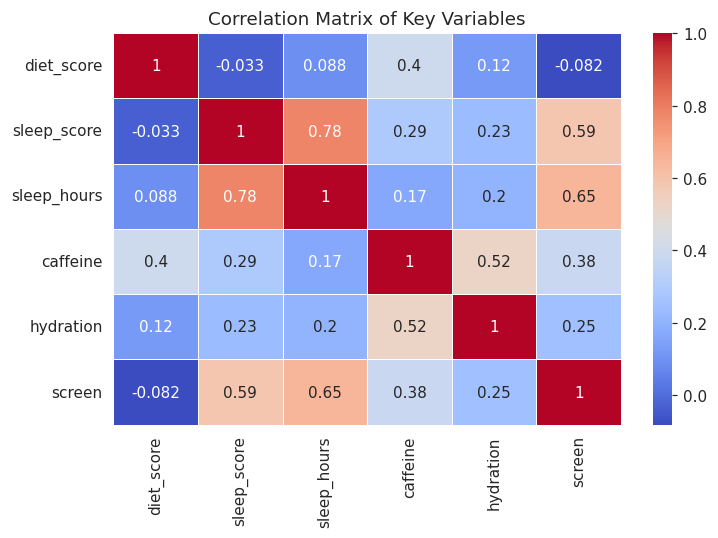

In [6]:
# This cell:
# - computes basic descriptive statistics for key numeric variables
# - plots a correlation matrix (heatmap) to visualize linear relationships

numeric_cols = ["diet_score","sleep_score","sleep_hours",
                "caffeine","hydration","screen"]

print("Descriptive statistics (numeric variables):")
display(df[numeric_cols].describe().T)

# Correlation matrix heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of Key Variables")
plt.tight_layout()
plt.show()


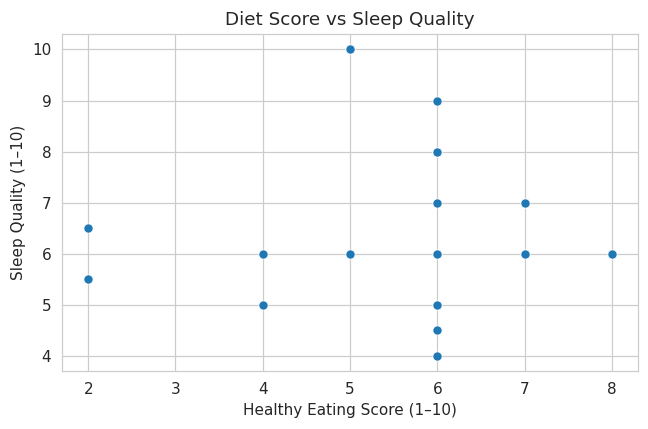

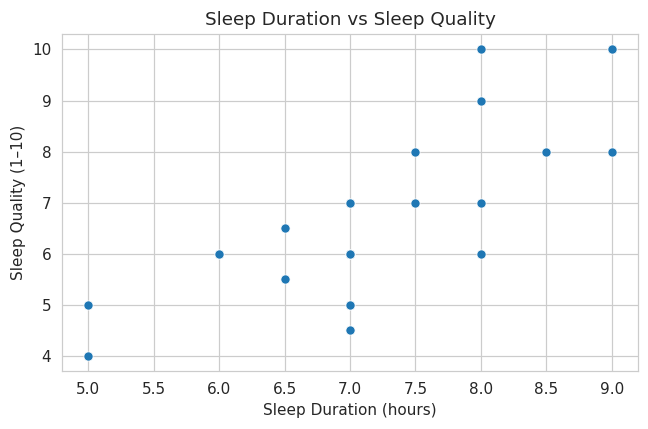

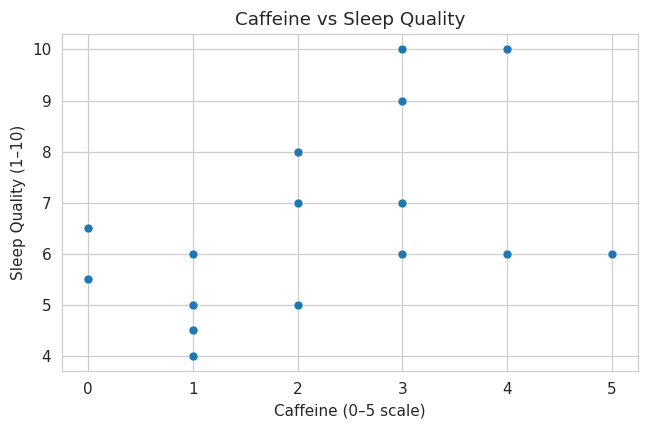

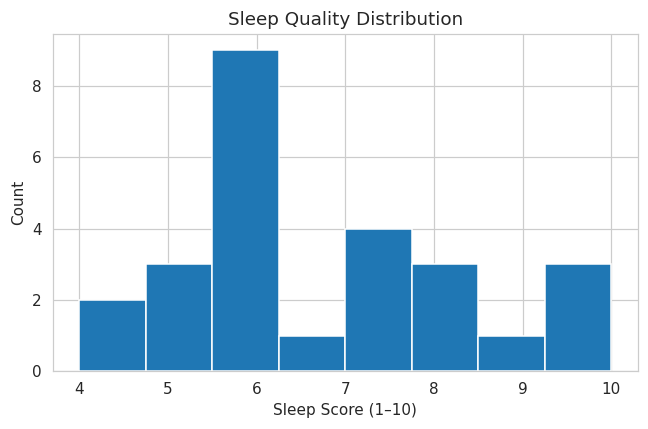

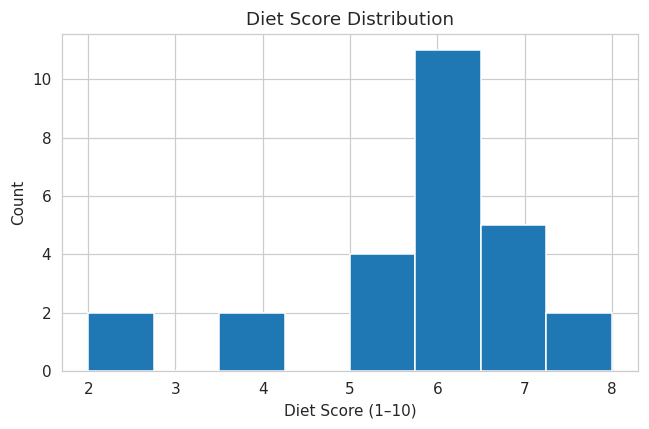

In [7]:
# This cell creates several visualizations:
# - scatter plots to explore pairwise relationships
# - histograms to see the distribution of scores

def scatter(x, y, xlabel=None, ylabel=None, title=None):
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=x, y=y)
    plt.xlabel(xlabel or x)
    plt.ylabel(ylabel or y)
    plt.title(title or f"{x} vs {y}")
    plt.tight_layout()
    plt.show()

# Diet score vs Sleep quality
scatter("diet_score", "sleep_score",
        "Healthy Eating Score (1–10)",
        "Sleep Quality (1–10)",
        "Diet Score vs Sleep Quality")

# Sleep duration vs Sleep quality
scatter("sleep_hours", "sleep_score",
        "Sleep Duration (hours)",
        "Sleep Quality (1–10)",
        "Sleep Duration vs Sleep Quality")

# Caffeine vs Sleep quality
scatter("caffeine", "sleep_score",
        "Caffeine (0–5 scale)",
        "Sleep Quality (1–10)",
        "Caffeine vs Sleep Quality")

# Histograms
plt.figure(figsize=(6,4))
df["sleep_score"].hist(bins=8)
plt.title("Sleep Quality Distribution")
plt.xlabel("Sleep Score (1–10)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
df["diet_score"].hist(bins=8)
plt.title("Diet Score Distribution")
plt.xlabel("Diet Score (1–10)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


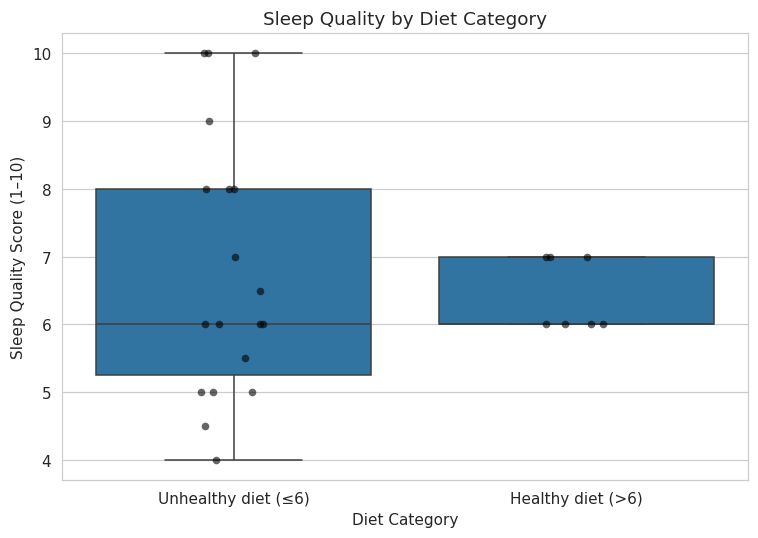

In [8]:
# This cell creates boxplots to compare the distribution of sleep quality
# between diet categories (healthy vs unhealthy).

# First, map the numeric category (0/1) to readable labels.
df["diet_category"] = df["healthy_diet"].map({0: "Unhealthy diet (≤6)", 1: "Healthy diet (>6)"})

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="diet_category", y="sleep_score")
sns.stripplot(data=df, x="diet_category", y="sleep_score",
              color="black", alpha=0.6, jitter=0.1)  # show individual points

plt.title("Sleep Quality by Diet Category")
plt.xlabel("Diet Category")
plt.ylabel("Sleep Quality Score (1–10)")
plt.tight_layout()
plt.show()


In [9]:
# This cell performs hypothesis testing and prints both r, t and p-values,
# with short explanations.

# H0: There is no relationship between healthy_diet (0/1) and sleep_score.
# H1: There is a relationship.

r, p = pearsonr(df["healthy_diet"], df["sleep_score"])

print("=== Pearson Correlation: Diet Category vs Sleep Quality ===")
print(f"Pearson r = {r:.3f}")
print(f"p-value   = {p:.3f}")
print()
print("Interpretation:")
print("- If p < 0.05, we reject H0 and say there is a significant relationship.")
print("- If p ≥ 0.05, we fail to reject H0 (no significant relationship).")

# Now compare mean sleep quality between healthy and unhealthy diet groups using a t-test.

healthy = df[df["healthy_diet"] == 1]["sleep_score"]
unhealthy = df[df["healthy_diet"] == 0]["sleep_score"]

t_stat, p_val = ttest_ind(healthy, unhealthy, equal_var=False)

print("\n=== Two-sample t-test: Healthy vs Unhealthy Diet (Sleep Quality) ===")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value     = {p_val:.3f}")
print()
print("Again, we compare the p-value with α = 0.05:")
print("- If p < 0.05 ⇒ significant difference between groups.")
print("- If p ≥ 0.05 ⇒ no significant difference between groups.")


=== Pearson Correlation: Diet Category vs Sleep Quality ===
Pearson r = -0.105
p-value   = 0.610

Interpretation:
- If p < 0.05, we reject H0 and say there is a significant relationship.
- If p ≥ 0.05, we fail to reject H0 (no significant relationship).

=== Two-sample t-test: Healthy vs Unhealthy Diet (Sleep Quality) ===
t-statistic = -0.795
p-value     = 0.434

Again, we compare the p-value with α = 0.05:
- If p < 0.05 ⇒ significant difference between groups.
- If p ≥ 0.05 ⇒ no significant difference between groups.


In [11]:
## How to Interpret the p-value



#- The p-value tells us how likely it is to observe our data (or more extreme) if the null hypothesis (H₀) is actually true.
#- If **p < 0.05**, we usually say the result is *statistically significant* and we **reject H₀**.
#- If **p ≥ 0.05**, we **fail to reject H₀**; this means we do not have strong enough evidence to claim an effect or relationship.

